<a href="https://colab.research.google.com/github/nahin333/DL-practice-codes/blob/main/overfitting__%26_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import os
import cv2
import PIL
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab.patches import cv2_imshow

In [44]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [45]:
data_dir

'./datasets/flower_photos'

In [46]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [47]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [48]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4754734410_94d98463a5.jpg'),
 PosixPath('datasets/flower_photos/roses/2215318403_06eb99176a.jpg'),
 PosixPath('datasets/flower_photos/roses/3624546109_8eb98f0cdb.jpg'),
 PosixPath('datasets/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17158274118_00ec99a23c.jpg')]

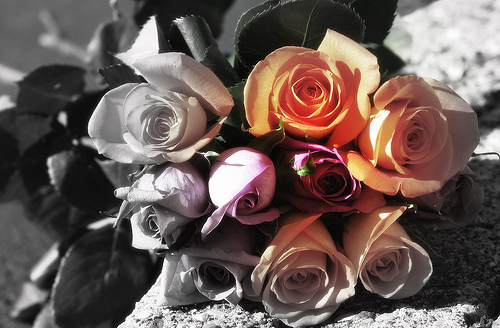

In [49]:
PIL.Image.open(str(roses[1]))

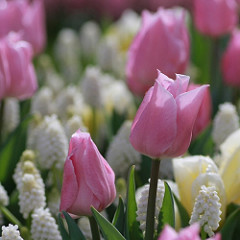

In [50]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [51]:
flower_iamges_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflower': list(data_dir.glob('sunflower/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [52]:
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflower': 3,
    'tulips': 4,
}

In [53]:
str(flower_iamges_dict['roses'][0])

'datasets/flower_photos/roses/4754734410_94d98463a5.jpg'

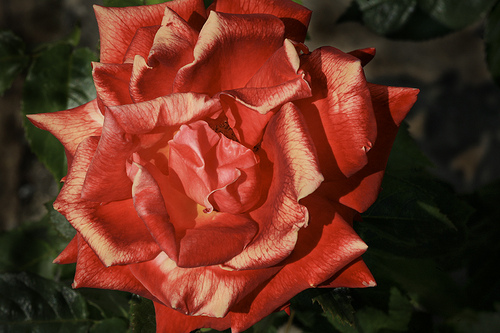

(333, 500, 3)


In [54]:
img = cv2.imread(str(flower_iamges_dict['roses'][0]))
cv2_imshow(img)
print(img.shape)

In [55]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [56]:
X, y = [],[]

for flower_name, images in flower_iamges_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180,180))
    X.append(resized_img)
    y.append(flower_labels_dict[flower_name])

In [57]:
X = np.array(X)
y = np.array(y)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

In [59]:
len(X_train)

2228

In [60]:
X_train[0].shape

(180, 180, 3)

In [61]:
img_height = X_train[0].shape[0]
img_width = X_train[0].shape[1]

In [62]:
X_train_scaled = X_train / 255
X_test_sacled = X_test / 255

In [63]:
X_train_scaled[:5]

array([[[[0.17647059, 0.36470588, 0.27843137],
         [0.17254902, 0.34901961, 0.2745098 ],
         [0.17254902, 0.3254902 , 0.2627451 ],
         ...,
         [0.21176471, 0.43921569, 0.34117647],
         [0.21568627, 0.42352941, 0.34509804],
         [0.21568627, 0.42352941, 0.34509804]],

        [[0.16862745, 0.35686275, 0.27058824],
         [0.16470588, 0.34117647, 0.26666667],
         [0.16078431, 0.31764706, 0.25098039],
         ...,
         [0.20784314, 0.42745098, 0.3372549 ],
         [0.20784314, 0.41960784, 0.3372549 ],
         [0.20392157, 0.40784314, 0.3372549 ]],

        [[0.17254902, 0.35294118, 0.2745098 ],
         [0.16470588, 0.33333333, 0.2627451 ],
         [0.16078431, 0.30980392, 0.24705882],
         ...,
         [0.20392157, 0.41568627, 0.33333333],
         [0.2       , 0.40784314, 0.33333333],
         [0.19607843, 0.39607843, 0.3254902 ]],

        ...,

        [[0.09019608, 0.30196078, 0.25098039],
         [0.10196078, 0.30588235, 0.23921569]

In [64]:
y_train[:5]

array([2, 4, 0, 4, 2])

##Without Image Augmentation

In [65]:
model = Sequential([
          layers.Conv2D(16, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Conv2D(32, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Conv2D(64, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),

          layers.Flatten(),
          layers.Dense(128, activation='relu'),
          layers.Dense(5)
])

In [66]:
model.compile(
    optimizer = 'adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [67]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
70/70 [==============================] - 5s 57ms/step - loss: 1.1419 - accuracy: 0.5085
Epoch 2/30
70/70 [==============================] - 4s 57ms/step - loss: 0.8766 - accuracy: 0.6418
Epoch 3/30
70/70 [==============================] - 4s 57ms/step - loss: 0.6983 - accuracy: 0.7338
Epoch 4/30
70/70 [==============================] - 4s 57ms/step - loss: 0.5223 - accuracy: 0.7962
Epoch 5/30
70/70 [==============================] - 4s 57ms/step - loss: 0.3366 - accuracy: 0.8793
Epoch 6/30
70/70 [==============================] - 4s 57ms/step - loss: 0.2042 - accuracy: 0.9286
Epoch 7/30
70/70 [==============================] - 4s 57ms/step - loss: 0.0980 - accuracy: 0.9717
Epoch 8/30
70/70 [==============================] - 4s 57ms/step - loss: 0.0737 - accuracy: 0.9834
Epoch 9/30
70/70 [==============================] - 4s 57ms/step - loss: 0.0357 - accuracy: 0.9915
Epoch 10/30
70/70 [==============================] - 4s 56ms/step - loss: 0.0747 - accuracy: 0.9811
Epoch 11/

In [68]:
model.evaluate(X_test_sacled, y_test)

24/24 [==============================] - 1s 23ms/step - loss: 2.1835 - accuracy: 0.6595


[2.183462381362915, 0.6594885587692261]

In [69]:
y_predicted = model.predict(X_test_sacled)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

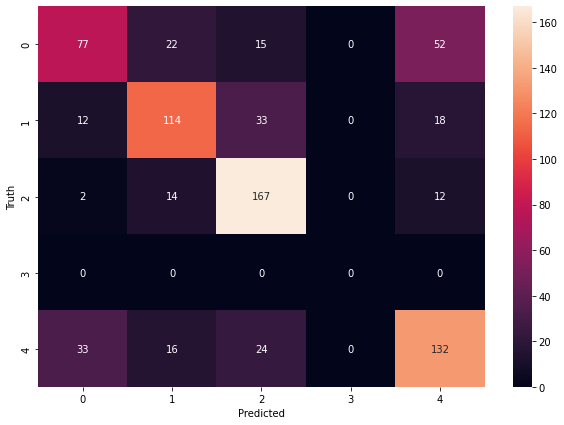

In [70]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test_sacled)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.46      0.53       166
           1       0.69      0.64      0.66       177
           2       0.70      0.86      0.77       195
           4       0.62      0.64      0.63       205

    accuracy                           0.66       743
   macro avg       0.66      0.65      0.65       743
weighted avg       0.66      0.66      0.65       743



In [72]:
data_augmentation = keras.Sequential([
              layers.experimental.preprocessing.RandomZoom(0.3)
])

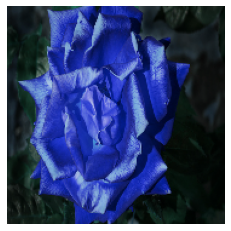

In [73]:
plt.axis('off')
plt.imshow(X[0])
#cv2_imshow(X[0])

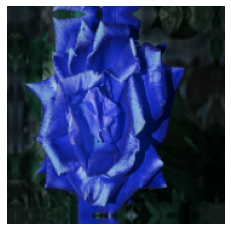

In [74]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [75]:
data_augmentation = keras.Sequential([
              layers.experimental.preprocessing.RandomContrast(0.9)
])

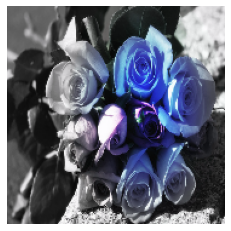

In [76]:
plt.axis('off')
plt.imshow(X[1])

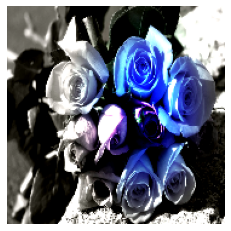

In [77]:
plt.axis('off')
plt.imshow(data_augmentation(X)[1].numpy().astype('uint8'))

In [78]:
data_augmentation = keras.Sequential([
              layers.experimental.preprocessing.RandomRotation(0.9)
])

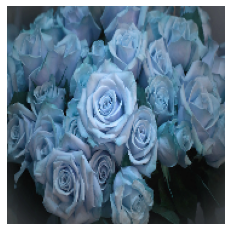

In [79]:
plt.axis('off')
plt.imshow(X[2])

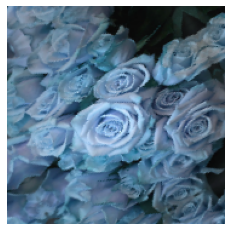

In [80]:
plt.axis('off')
plt.imshow(data_augmentation(X)[2].numpy().astype('uint8'))

##With Image Augmentation

In [81]:
data_augmentation = keras.Sequential([
              layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
              layers.experimental.preprocessing.RandomRotation(0.1),
              layers.experimental.preprocessing.RandomZoom(0.1),
])

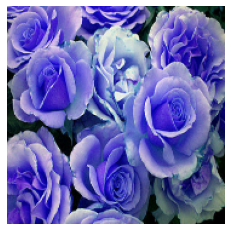

In [82]:
plt.axis('off')
plt.imshow(X[3])

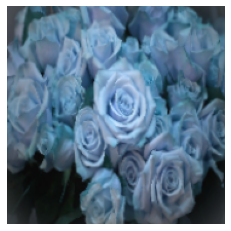

In [83]:
plt.axis('off')
plt.imshow(data_augmentation(X)[2].numpy().astype('uint8'))

In [84]:
model = Sequential([
          data_augmentation,
          layers.Conv2D(16, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Conv2D(32, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Conv2D(64, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),

          layers.Dropout(0.2),
          layers.Flatten(),
          layers.Dense(128, activation='relu'),
          layers.Dense(5)
])

In [85]:
model.compile(
    optimizer = 'adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [86]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
70/70 [==============================] - 6s 65ms/step - loss: 1.2587 - accuracy: 0.3990
Epoch 2/30
70/70 [==============================] - 5s 65ms/step - loss: 1.0146 - accuracy: 0.5552
Epoch 3/30
70/70 [==============================] - 5s 65ms/step - loss: 0.8975 - accuracy: 0.6378
Epoch 4/30
70/70 [==============================] - 5s 65ms/step - loss: 0.8340 - accuracy: 0.6701
Epoch 5/30
70/70 [==============================] - 5s 65ms/step - loss: 0.7887 - accuracy: 0.6813
Epoch 6/30
70/70 [==============================] - 5s 65ms/step - loss: 0.7724 - accuracy: 0.6858
Epoch 7/30
70/70 [==============================] - 4s 64ms/step - loss: 0.7324 - accuracy: 0.7002
Epoch 8/30
70/70 [==============================] - 5s 65ms/step - loss: 0.6976 - accuracy: 0.7177
Epoch 9/30
70/70 [==============================] - 5s 65ms/step - loss: 0.6656 - accuracy: 0.7374
Epoch 10/30
70/70 [==============================] - 5s 65ms/step - loss: 0.6327 - accuracy: 0.7509
Epoch 11/

In [87]:
model.evaluate(X_test_sacled, y_test)

24/24 [==============================] - 1s 22ms/step - loss: 0.8248 - accuracy: 0.7429


[0.8248266577720642, 0.7429340481758118]

In [88]:
y_predicted = model.predict(X_test_sacled)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

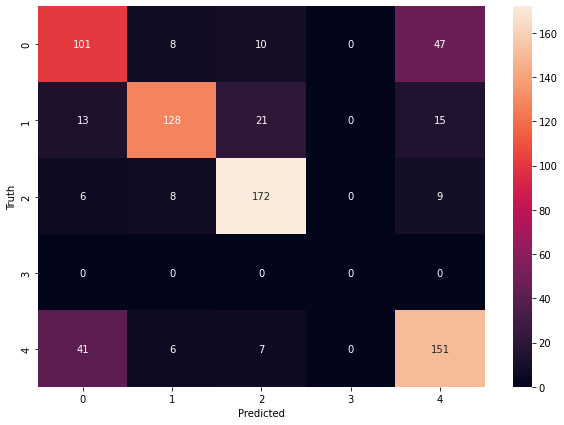

In [89]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [90]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test_sacled)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.61      0.62       166
           1       0.85      0.72      0.78       177
           2       0.82      0.88      0.85       195
           4       0.68      0.74      0.71       205

    accuracy                           0.74       743
   macro avg       0.74      0.74      0.74       743
weighted avg       0.75      0.74      0.74       743

